In [1]:
import numpy as np    # casting the polygons into np.arrays allows to transpose them easily with the .T function
import matplotlib.pyplot as plt    # to plot the counties

In [2]:
%run get_data.ipynb
print("All data is ready!")

Polished county data from file is ready to go!
Polished covid19 data from file is ready to go!
Saved seemingly flawless covid19 data.
All data is ready!


## Create color schemes

In [3]:
red_to_yellow_to_green = list()
for color_step in np.arange(0,1,0.01):
    red_to_yellow_to_green.append((color_step, 1, 0))
for color_step in np.arange(0,1,0.01):
    red_to_yellow_to_green.append((1, 1 - color_step, 0))

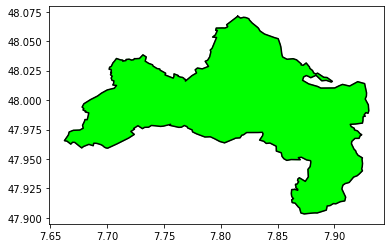

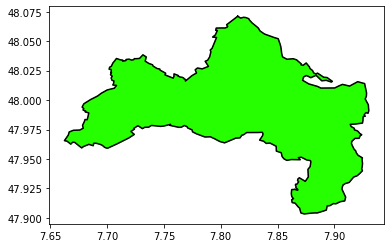

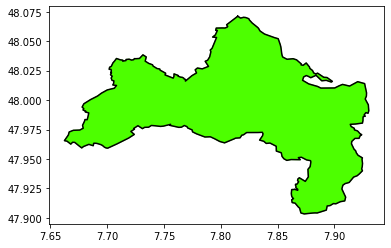

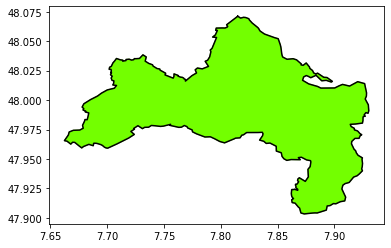

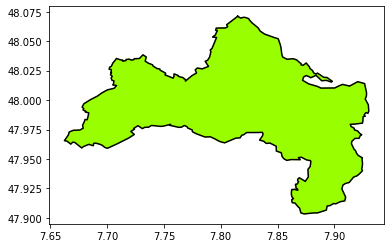

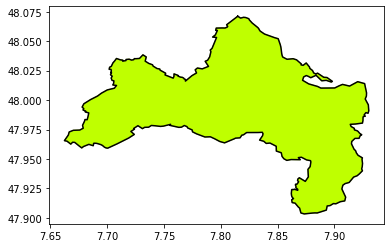

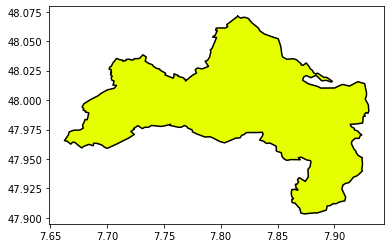

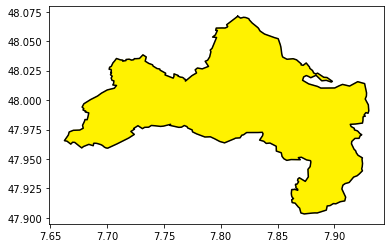

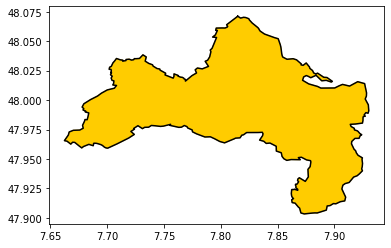

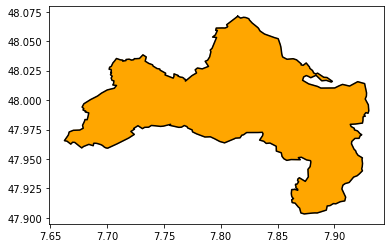

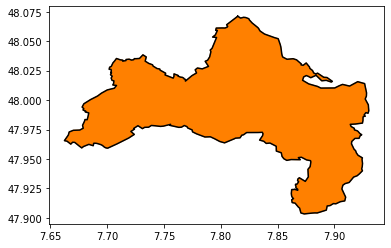

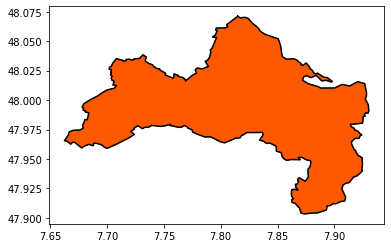

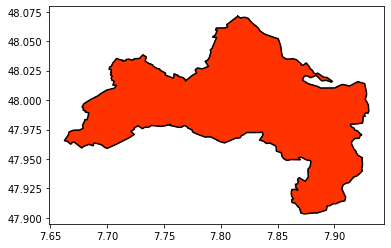

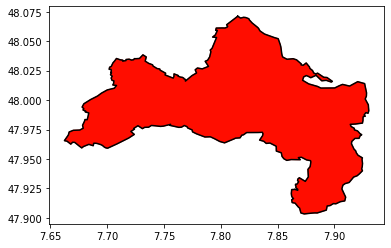

In [4]:
for colorID in range(0, len(red_to_yellow_to_green), 15):
    for polygon in counties_geography["8311"]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=red_to_yellow_to_green[colorID])
        plt.plot(x, y, color=(0,0,0))
    plt.show()

In [5]:
blue_to_white_to_red = list()
for color_step in np.arange(0,1,0.01):
    blue_to_white_to_red.append((color_step, color_step, 1))
for color_step in np.arange(0,1,0.01):
    blue_to_white_to_red.append((1, 1 - color_step, 1 - color_step))

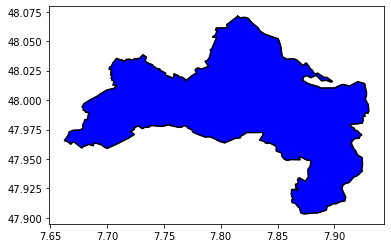

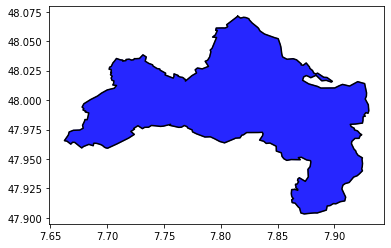

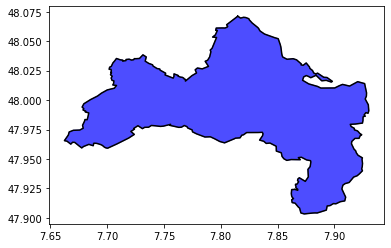

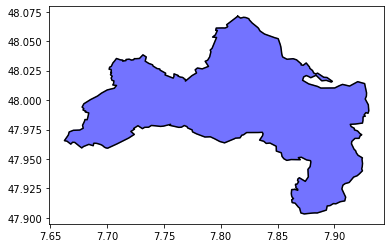

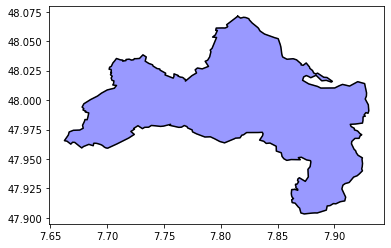

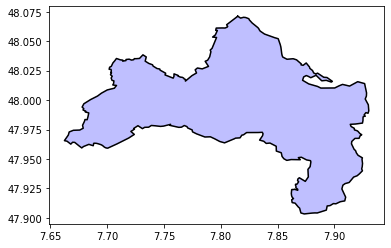

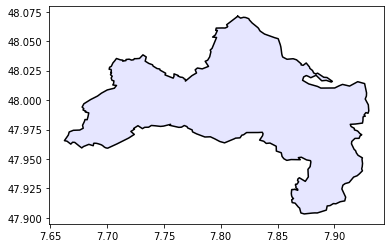

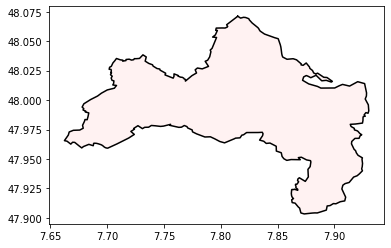

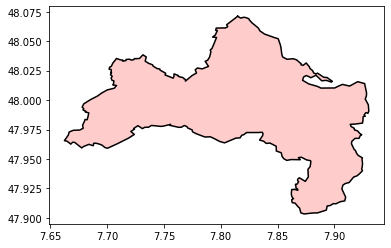

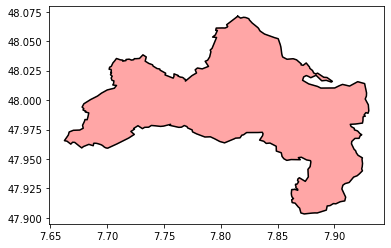

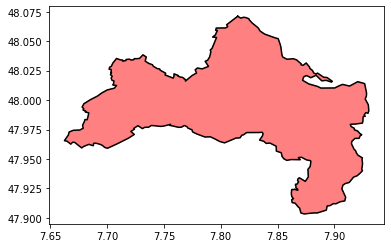

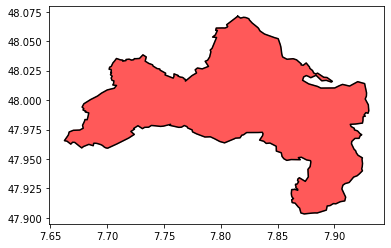

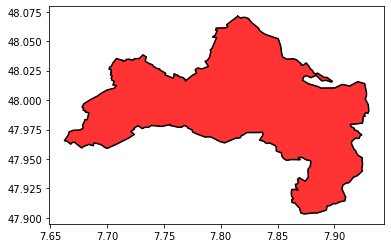

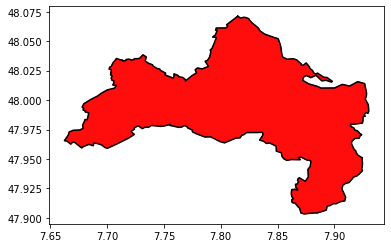

In [6]:
for colorID in range(0, len(blue_to_white_to_red), 15):
    for polygon in counties_geography["8311"]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=blue_to_white_to_red[colorID])
        plt.plot(x, y, color=(0,0,0))
    plt.show()

## Plot examples

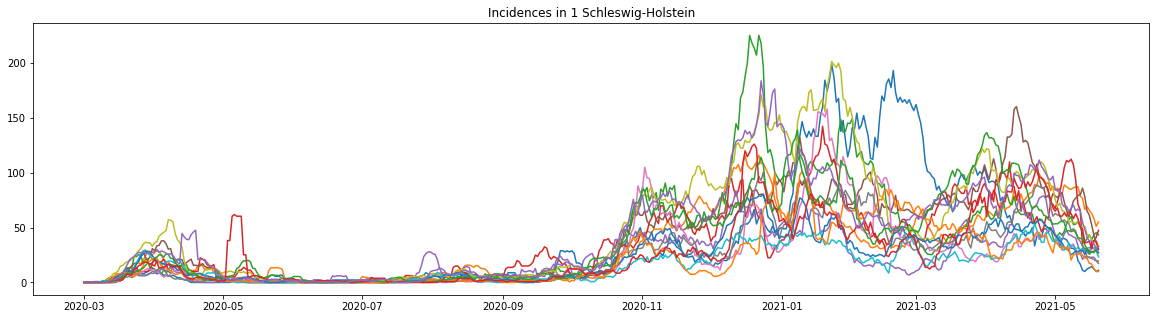

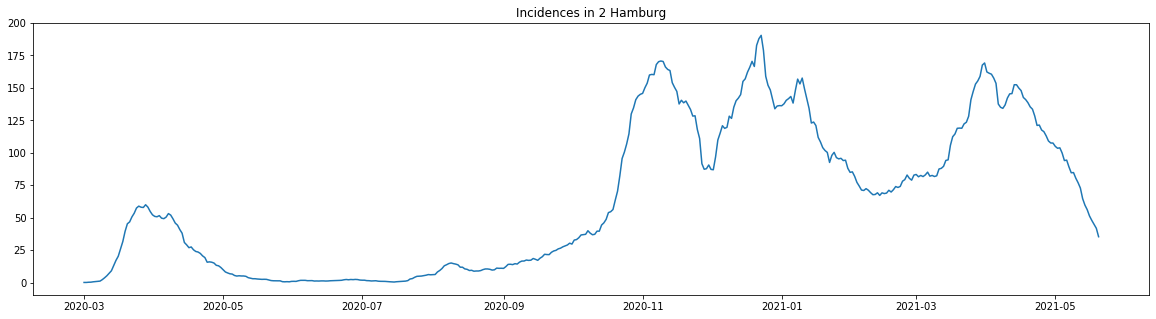

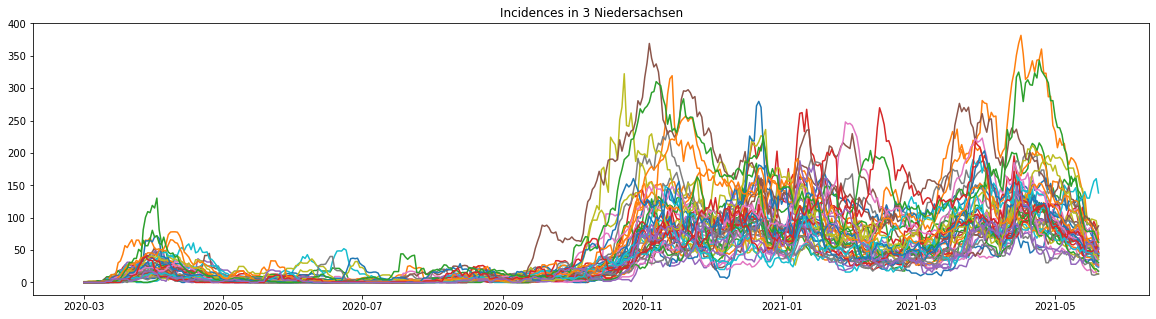

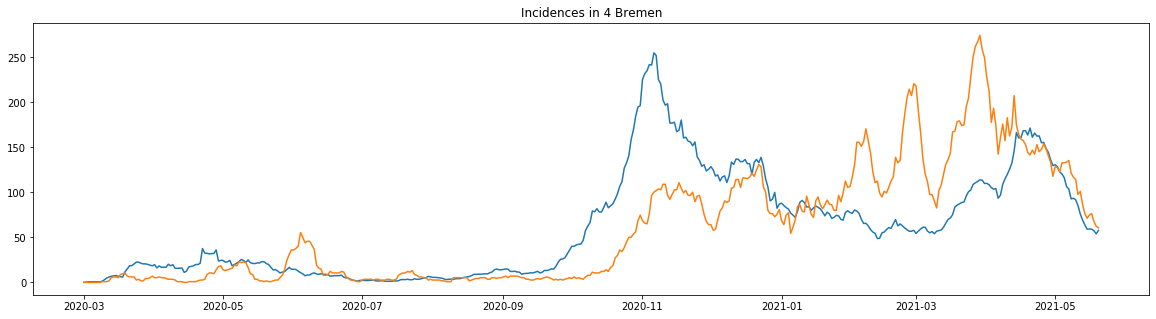

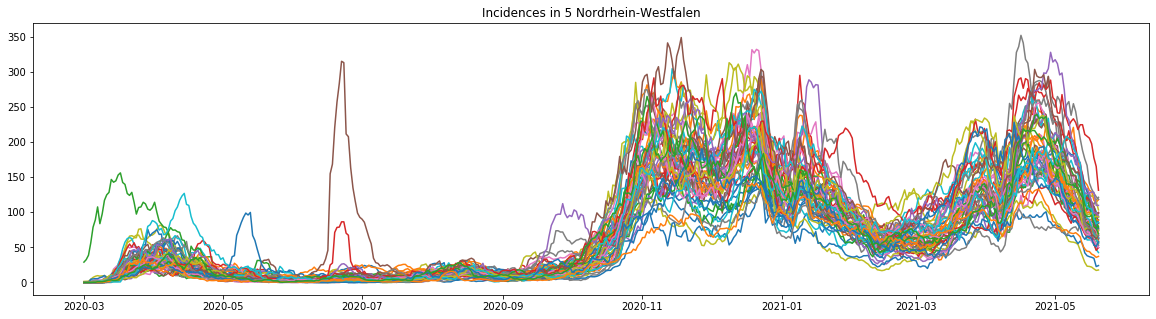

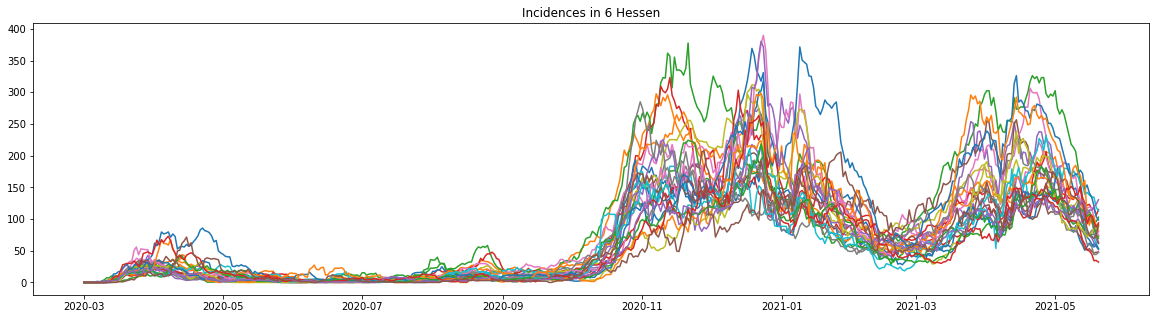

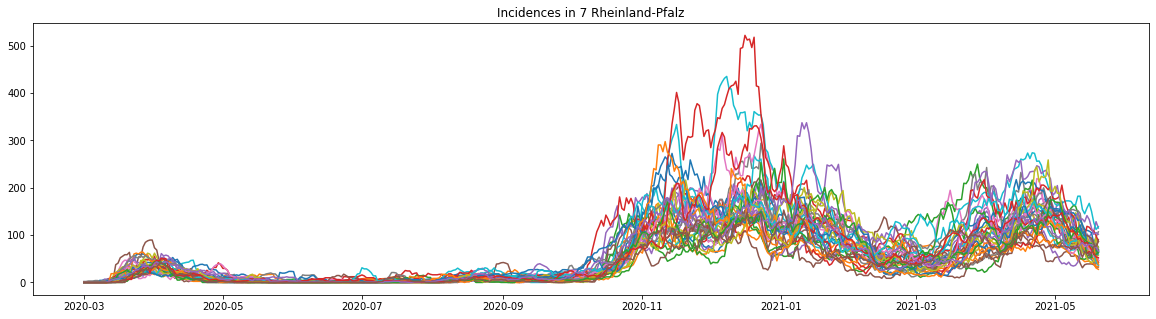

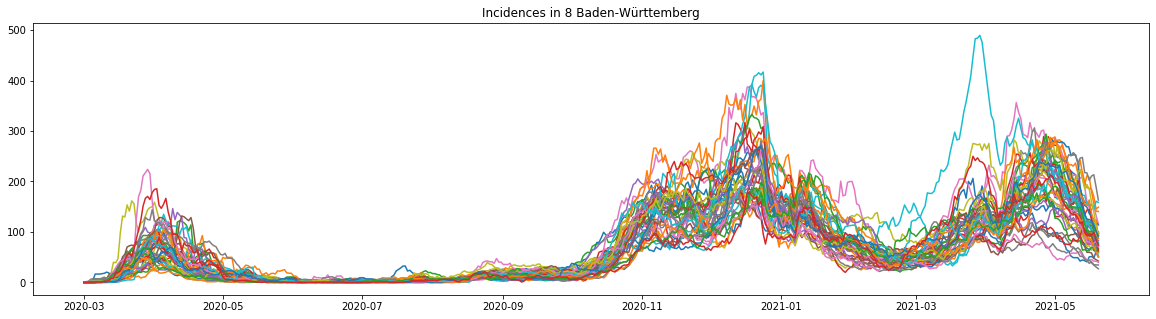

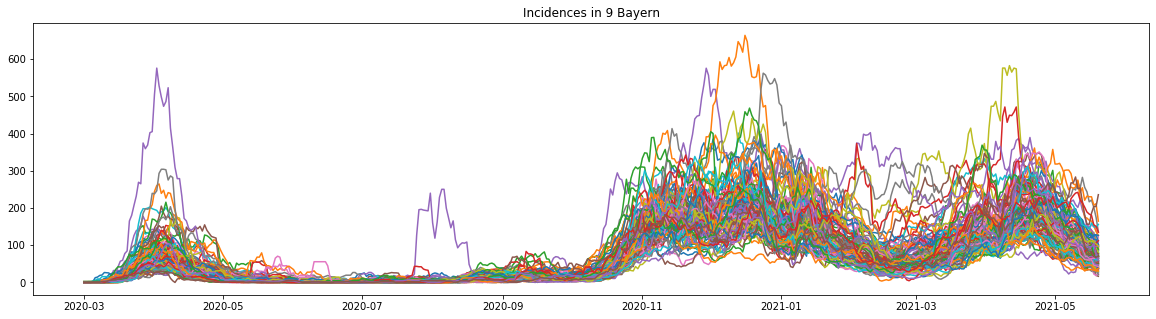

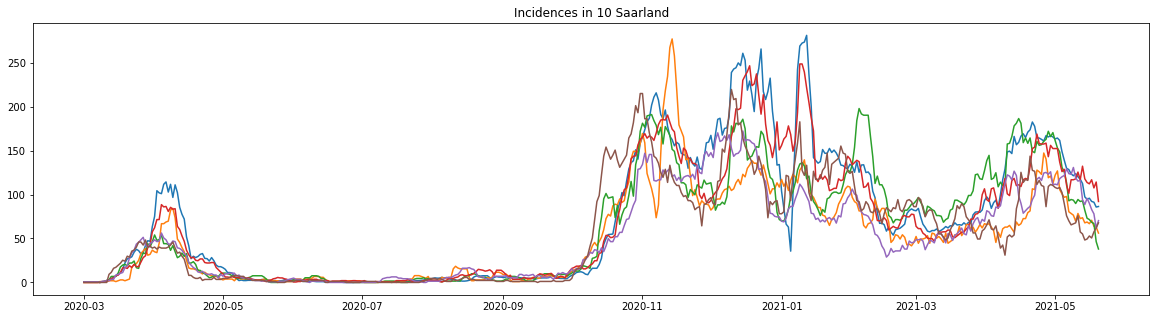

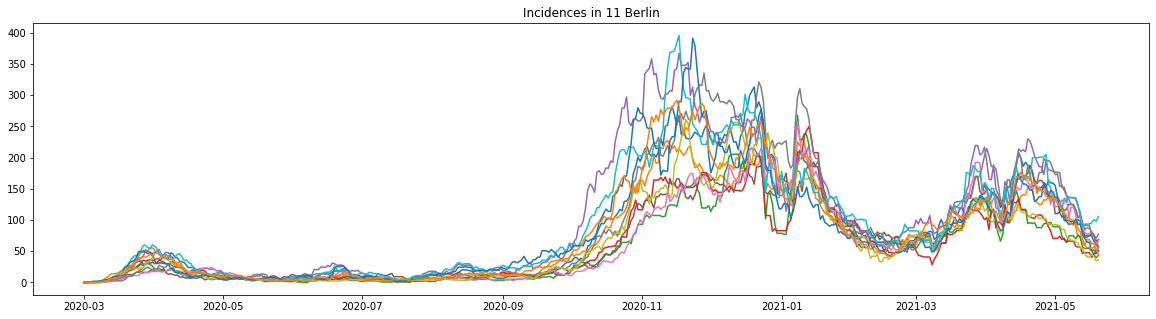

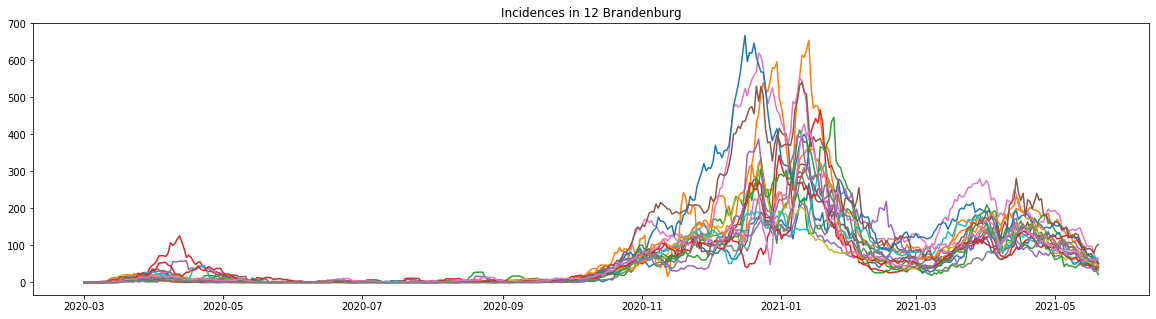

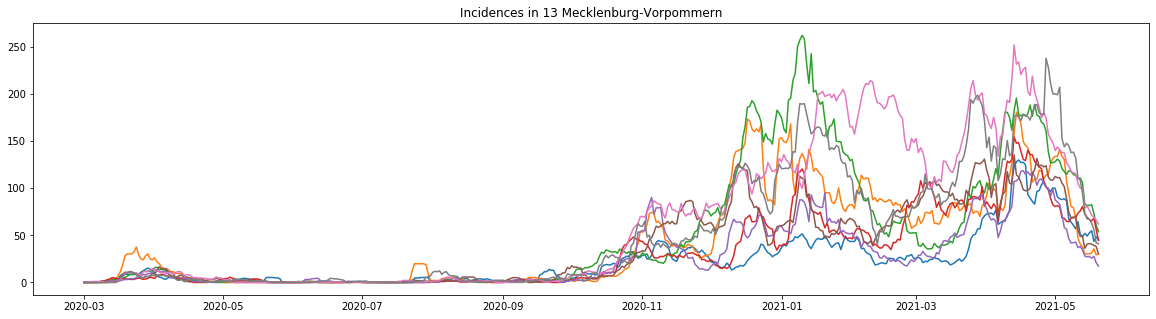

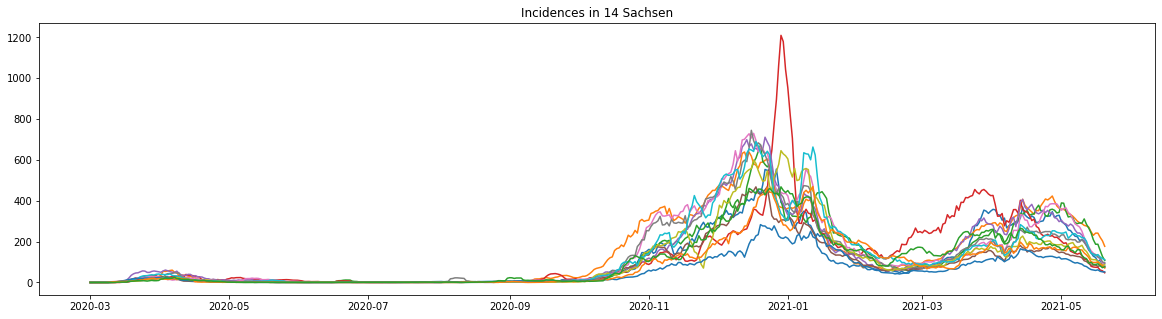

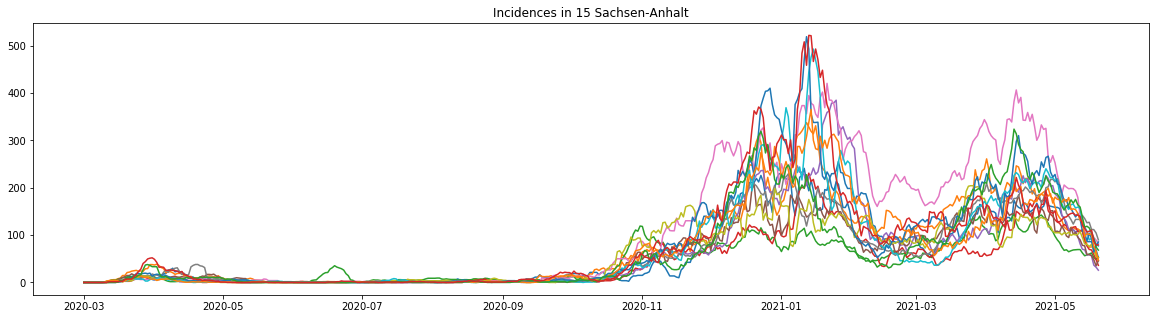

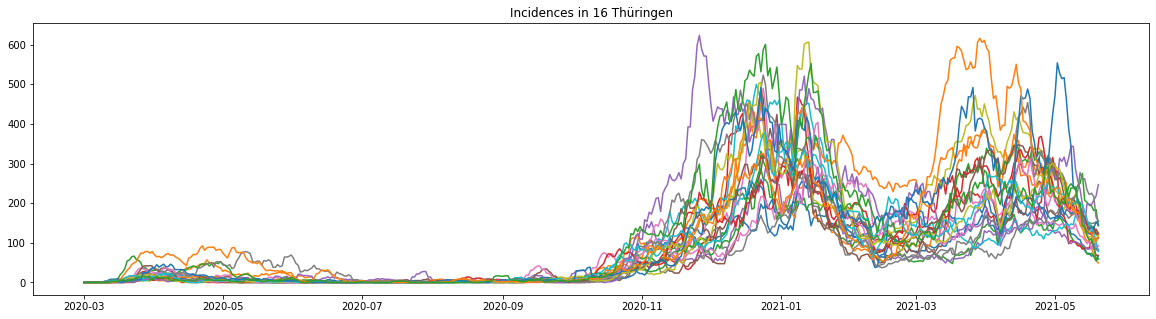

In [7]:
# copy to check that all counties are related to a federal state
covid19_copy = covid19.copy()
for stateID, state in non_county_specific_data['states'].items():
    plt.figure(figsize=(20, 5))    # enlarge plot
    plt.title("Incidences in {} {}".format(stateID, state))
    for AdmUnitID, county in covid19.items():
        if AdmUnitID[:-3] == stateID:
            plt.plot(non_county_specific_data['UTC'], county['incidences'])
            del covid19_copy[AdmUnitID]
    plt.show()

In [8]:
if len(covid19_copy) != 0:
    print('There seems to be at least one county being unrelated to any federal state:')
    for AdmUnitID in covid19_copy.keys():
        print(AdmUnitID + " " + counties_geography[AdmUnitId]['name'])

## Plot data of one state

In [9]:
example_state_ID = "13"
print("You have chosen {} {}".format(example_state_ID, non_county_specific_data['states'][example_state_ID]))

You have chosen 13 Mecklenburg-Vorpommern


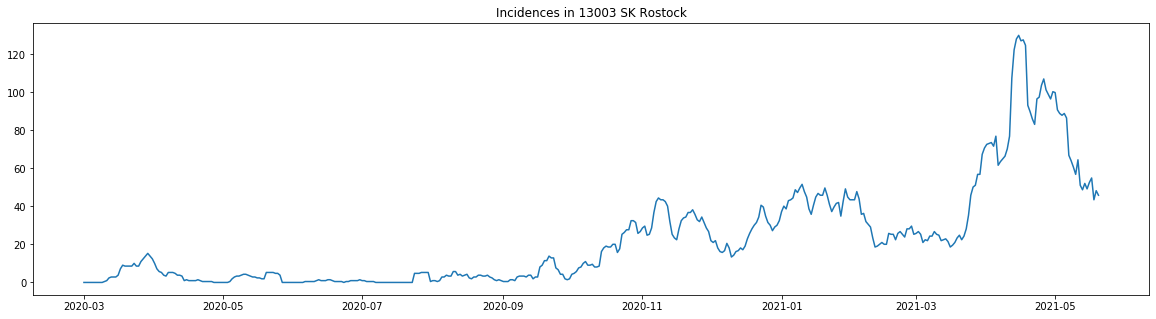

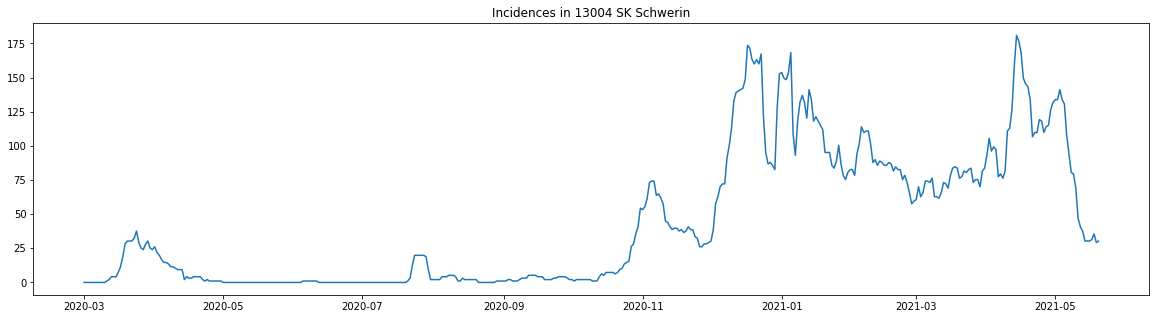

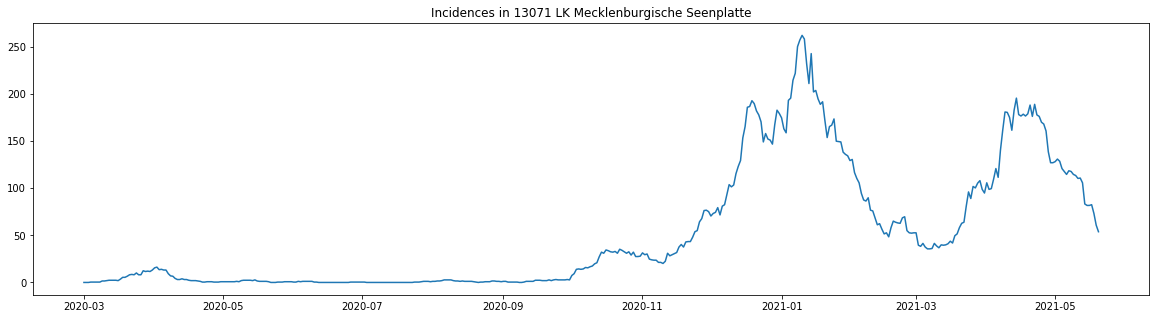

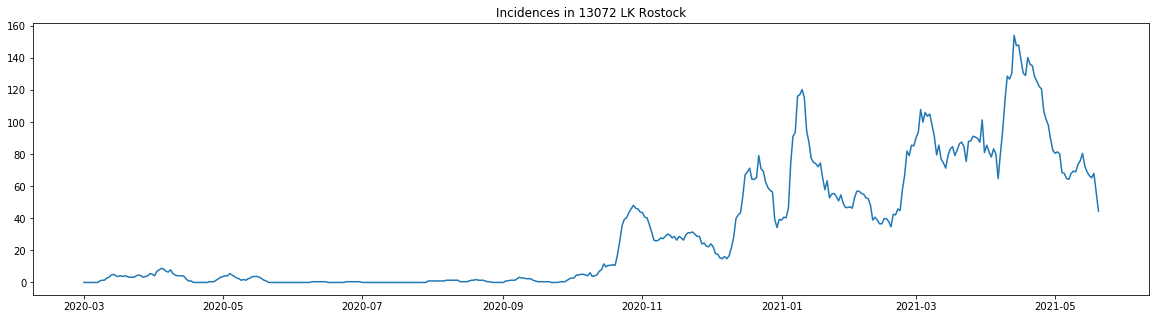

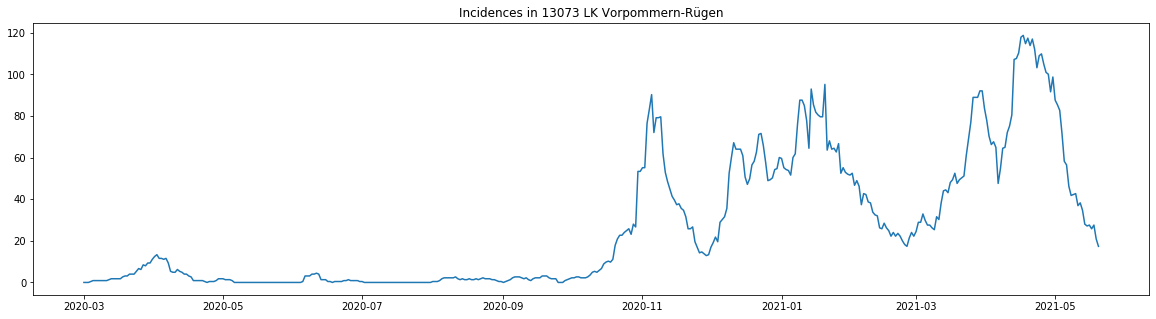

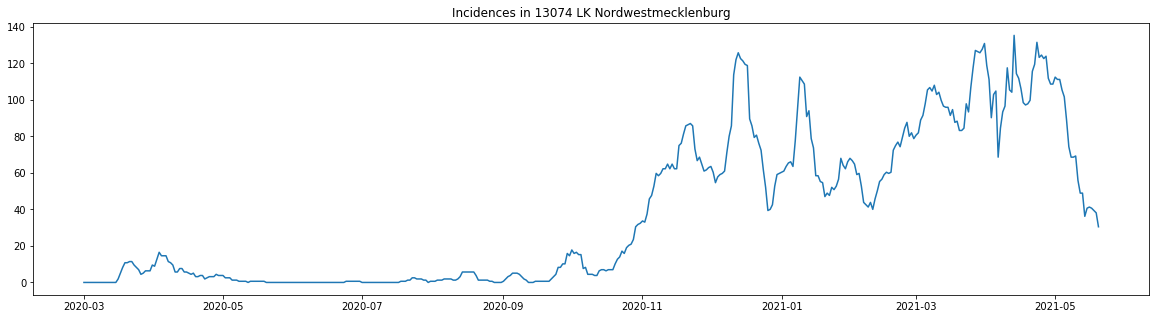

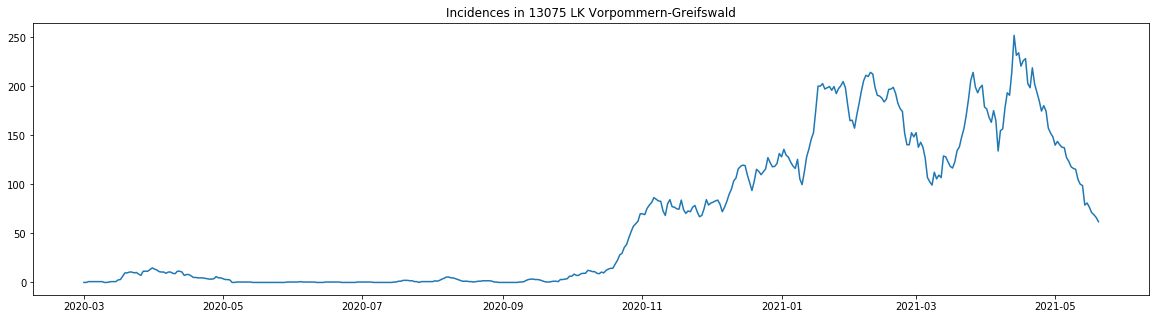

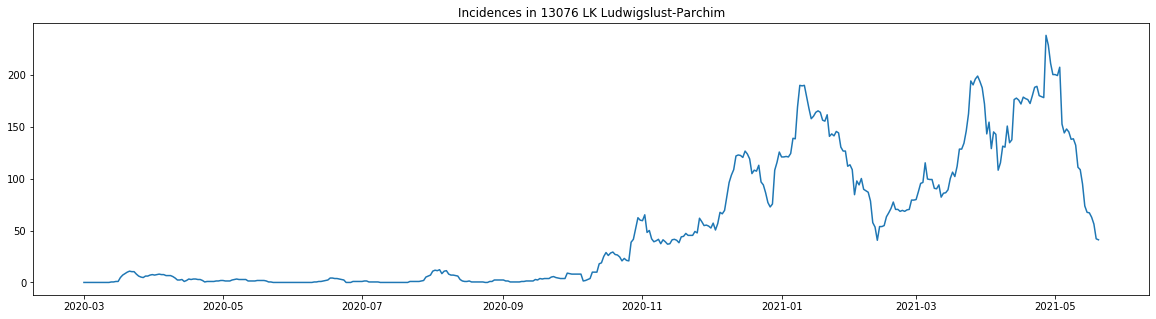

In [10]:
counties_in_example_state = list()
for AdmUnitID, county in covid19.items():
    if AdmUnitID[:-3] == "13":
        counties_in_example_state.append(AdmUnitID)
        plt.figure(figsize=(20, 5))    # enlarge plot
        plt.plot(non_county_specific_data['UTC'], county['incidences'])
        plt.title("Incidences in " + AdmUnitID + " " + counties_geography[AdmUnitID]['name'])
        plt.show()

(0.3671286049591043, 1, 0)
(0.24254335985280126, 1, 0)
(0.430884165006936, 1, 0)
(0.35589497391030334, 1, 0)
(0.13885056652811278, 1, 0)
(0.2440853790315404, 1, 0)
(0.49570712536552036, 1, 0)
(0.3286444831640531, 1, 0)


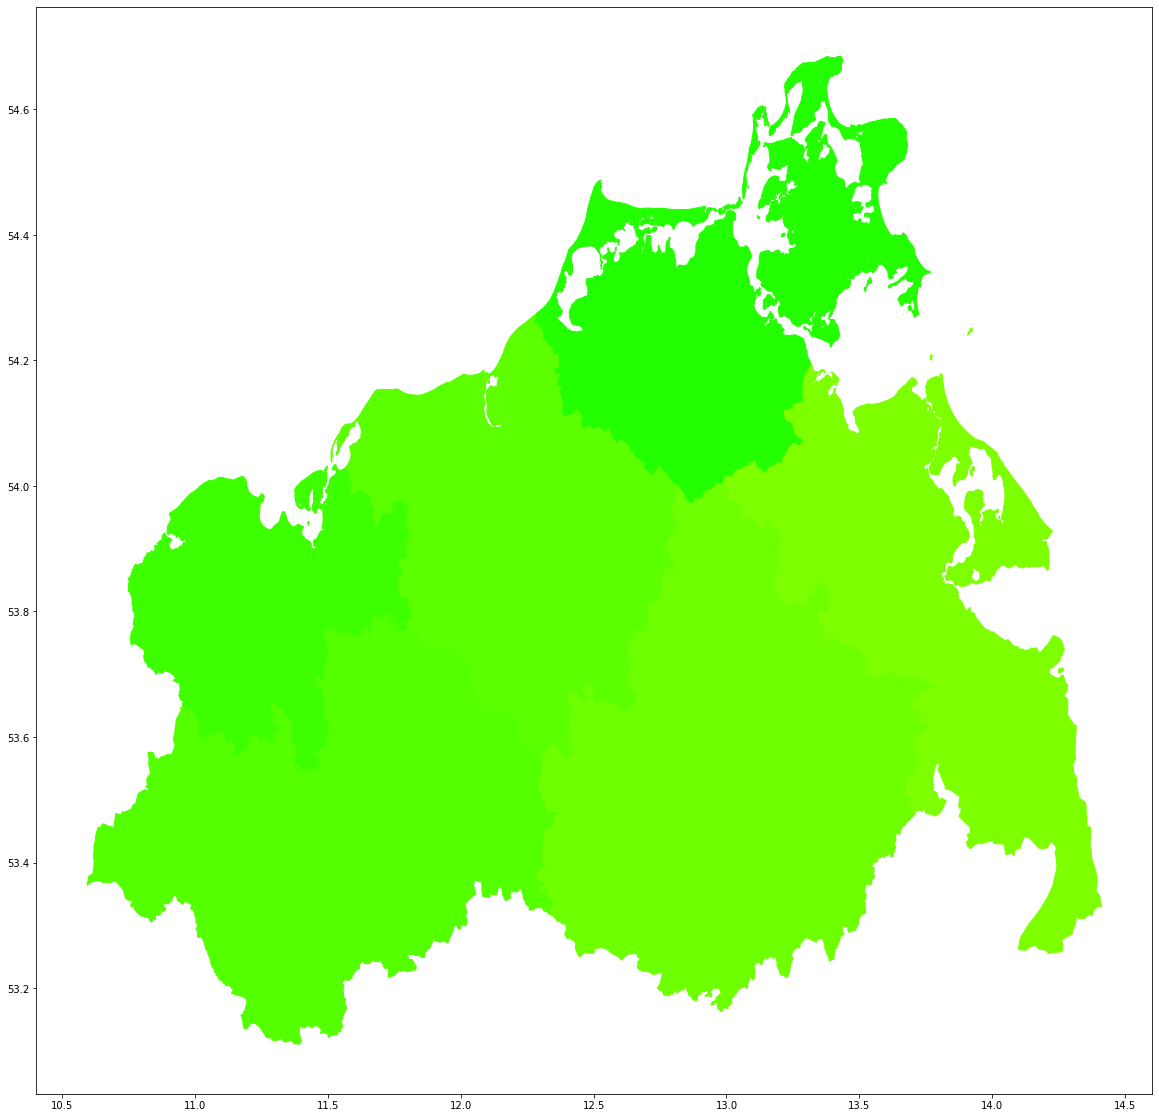

In [27]:
plt.figure(figsize = (20, 20))    # enlarge plot
for AdmUnitID in counties_in_example_state:
    # get last incidence and divide it by the highest incidence to get a number between 0 and 1
    # to get the full range of colors the both incidence values get subtracted by the lowest incidence
    color_step = covid19[AdmUnitID]['incidences'][-1]/250
    # everything bellow 0.5 gets drawn green
    if color_step < 0.5:
        color = (color_step * 2, 1, 0)
    else:
        color_step = (color_step - 0.5) * 2
        color = (1, 1 - color_step, 0)
    print(color)
    for polygon in counties_geography[AdmUnitID]['geometry']:
        x,y = np.array(polygon).T
        plt.fill(x, y, color=color)
plt.show()

## Normating the color schemes
Aiming for an even distribution between all color fields

414
423
431
435
409
408
401
409
415
417
425
494
496
522
512
514
496
518
415
413
407
446
482
483
489
476
439
403
400
408
410
415
411
416
401
400
408
439
446
448
496
532
575
556
499
518
518
471
435
413
404
475
487
527
592
572
582
583
604
581
590
605
647
636
618
663
647
594
552
550
552
585
508
471
475
404
402
405
505
576
528
498
473
485
523
415
402
423
518
562
557
542
533
535
547
530
482
474
421
430
427
442
460
421
416
427
440
418
403
403
425
403
414
412
473
473
486
456
434
576
576
556
582
565
576
573
456
445
471
430
449
448
457
471
405
400
422
458
448
468
448
436
434
419
430
455
509
539
519
515
543
579
578
595
498
472
432
426
503
555
613
607
629
654
526
470
478
474
445
407
427
442
431
465
433
416
405
401
420
473
480
474
476
498
523
503
530
547
558
569
619
611
581
517
482
503
525
493
464
455
431
417
405
488
482
510
550
545
515
483
417
475
504
533
569
619
667
597
620
618
646
608
587
568
567
526
460
416
415
400
411
434
446
400
402
422
415
435
435
452
470
474
455
530
488
529
504
415
400
467


<function matplotlib.pyplot.show(*args, **kw)>

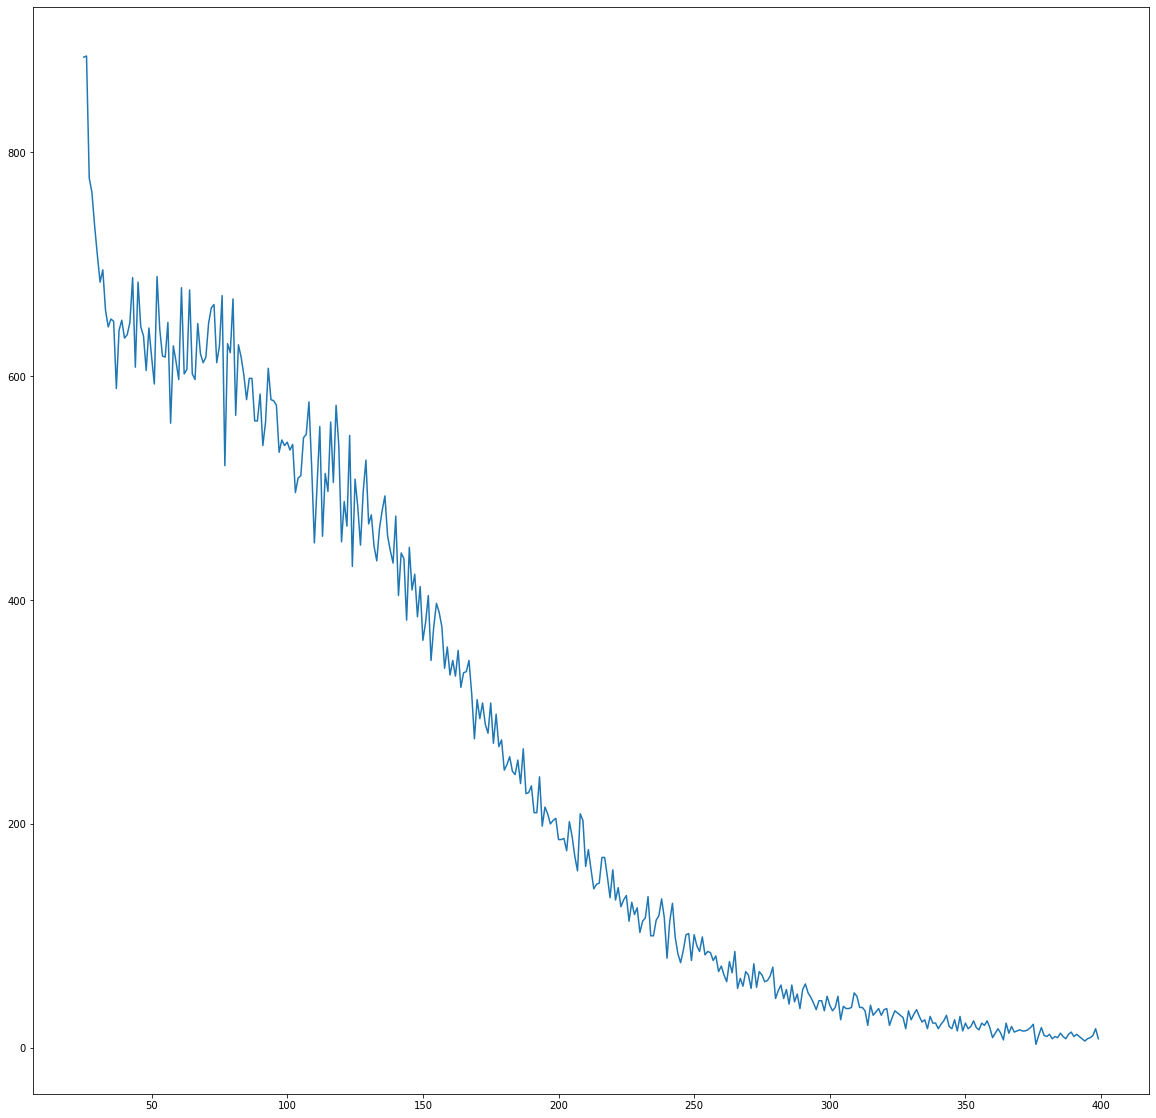

In [25]:
plt.figure(figsize = (20, 20))    # enlarge plot
distribution_of_incidences = [0 for e in range(400)]
for county in covid19.values():
    for incidence in county['incidences']:
        if int(incidence) >= 250:
            print(int(incidence))
        else:
            distribution_of_incidences[int(incidence)] += 1
plt.plot([e + 25 for e in range(375)], distribution_of_incidences[25:])
plt.show